### well structured - an ode to databases


# linear regression

### import libraries

In [225]:
# access libaries
import yfinance as yf
import sqlite3

# scientific computing pandas (data structures & tools), NumPy (array & tools), SciPy (Integrals, solving differential equations, optimization)
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# Visualization matplotlib (plots & graphs, most popular), seaborn (plots: heat maps, time series, violin plots)
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

In [226]:
class stock_mode:
    def __init__(self, ticker_symbol):

        # load data
        self.ticker_symbol = ticker_symbol
        self.company_name = yf.Ticker(self.ticker_symbol).info['longName'].replace(r'/', ' ')
        self.currency = yf.Ticker(self.ticker_symbol).info['currency']

# ------------------------ DATABASE -----------------------------------------

    def to_sqlite_database(self, db_name):

        conn = sqlite3.connect(db_name)
        self.to_sql_stock_prices.to_sql(name=self.company_name, con=conn, if_exists='replace')
        conn.commit()
        conn.close() 

    def read_sqlite_database(self, ticker_symbol, db_name, columns):
               
        company_name = yf.Ticker(ticker_symbol).info['longName'].replace(r'/', ' ')
        conn = sqlite3.connect(db_name)
        sql = "SELECT " + columns + " FROM `" + company_name + "`"
        result = pd.read_sql(sql,conn)
        return result
    
# ------------------------ SCIENTIFIC COMPUTING -----------------------------------------



# linear regression

build dataframe

In [265]:
ticker_symbols = ['WOOE.AS', 'WY', 'SCA-B.ST', 'SUZ', 'SK3.IR', 'IP', 'STERV.HE','RYN', 'WFG', 'WRK', 'PCH']
bucket_stock_prices = pd.DataFrame()

for ticker_symbol in ticker_symbols:
    
    # load first item
    stock_mode_obj = stock_mode(ticker_symbol)
    columns = '`close_normal_' + ticker_symbol + '`'
    bucket_stock_prices_load = stock_mode_obj.read_sqlite_database(stock_mode_obj.ticker_symbol, 'stocks_prep.db', columns)

    # concat data
    bucket_stock_prices = pd.concat([bucket_stock_prices, bucket_stock_prices_load], axis=1)

bucket_stock_prices.head(2)

,close_normal_WOOE.AS,close_normal_WY,close_normal_SCA-B.ST,close_normal_SUZ,close_normal_SK3.IR,close_normal_IP,close_normal_STERV.HE,close_normal_RYN,close_normal_WFG,close_normal_WRK,close_normal_PCH
0,0.780673,0.797964,0.644627,0.635598,0.896732,0.901814,0.684542,0.779544,0.695476,0.810607,0.846914
1,0.777786,0.777169,0.627652,0.628880,0.884664,0.895734,0.673074,0.770119,0.694028,0.796625,0.833761


In [329]:
sim_lin_reg_dep_var = pd.DataFrame(bucket_stock_prices['close_normal_WOOE.AS'])

ticker_symbols = ['WY', 'SCA-B.ST', 'SUZ', 'SK3.IR', 'IP', 'STERV.HE','RYN', 'WFG', 'WRK', 'PCH']

bucket_sim_lin_reg = pd.DataFrame()
 
for ticker_symbol in ticker_symbols:
    lm = LinearRegression()

    sim_lin_reg_dep_var = pd.DataFrame(bucket_stock_prices['close_normal_WOOE.AS'])
    sim_lin_reg_indep_var = pd.DataFrame(bucket_stock_prices['close_normal_' + ticker_symbol])
    lm.fit(sim_lin_reg_dep_var,sim_lin_reg_indep_var)
    #print(sim_lin_reg_indep_var)

    # predict model
    bucket_sim_lin_reg_load = lm.predict(sim_lin_reg_dep_var)
        
    # transform and rename df
    bucket_sim_lin_reg_load = map(lambda x: x[0], bucket_sim_lin_reg_load)
    bucket_sim_lin_reg_load = pd.Series(bucket_sim_lin_reg_load)
    bucket_sim_lin_reg_load = bucket_sim_lin_reg_load.rename('sim_lin_reg_' + ticker_symbol)
    
    # concat data
    bucket_sim_lin_reg = pd.concat([bucket_sim_lin_reg, bucket_sim_lin_reg_load], axis=1)

    # calculate intercept and slope
    intercept = lm.intercept_[0].round(5)
    slope = lm.coef_[0].round(5)
    
    print(ticker_symbol)
    print('The intercept is: ' ,intercept,'. And the slope is' , slope[0], '.') 
print(bucket_sim_lin_reg.head(2))

WY
The intercept is:  0.02672 . And the slope is 0.90546 .
SCA-B.ST
The intercept is:  0.18963 . And the slope is 0.67309 .
SUZ
The intercept is:  0.38092 . And the slope is 0.48347 .
SK3.IR
The intercept is:  0.1457 . And the slope is 0.7408 .
IP
The intercept is:  -0.3072 . And the slope is 1.27673 .
STERV.HE
The intercept is:  -0.4432 . And the slope is 1.36335 .
RYN
The intercept is:  -0.06672 . And the slope is 0.98477 .
WFG
The intercept is:  0.14163 . And the slope is 0.73521 .
WRK
The intercept is:  -0.43075 . And the slope is 1.35395 .
PCH
The intercept is:  0.41253 . And the slope is 0.4905 .
   sim_lin_reg_WY  sim_lin_reg_SCA-B.ST  sim_lin_reg_SUZ  sim_lin_reg_SK3.IR  \
0        0.733590              0.715097         0.758350            0.724024   
1        0.730976              0.713154         0.756954            0.721885   

   sim_lin_reg_IP  sim_lin_reg_STERV.HE  sim_lin_reg_RYN  sim_lin_reg_WFG  \
0        0.689504              0.621125         0.702063         0.71559

In [287]:
Yhat=lm.predict(sim_lin_reg_dep_var)
len(Yhat.tolist())
#Yhat[0:3]  

624

### regression plot

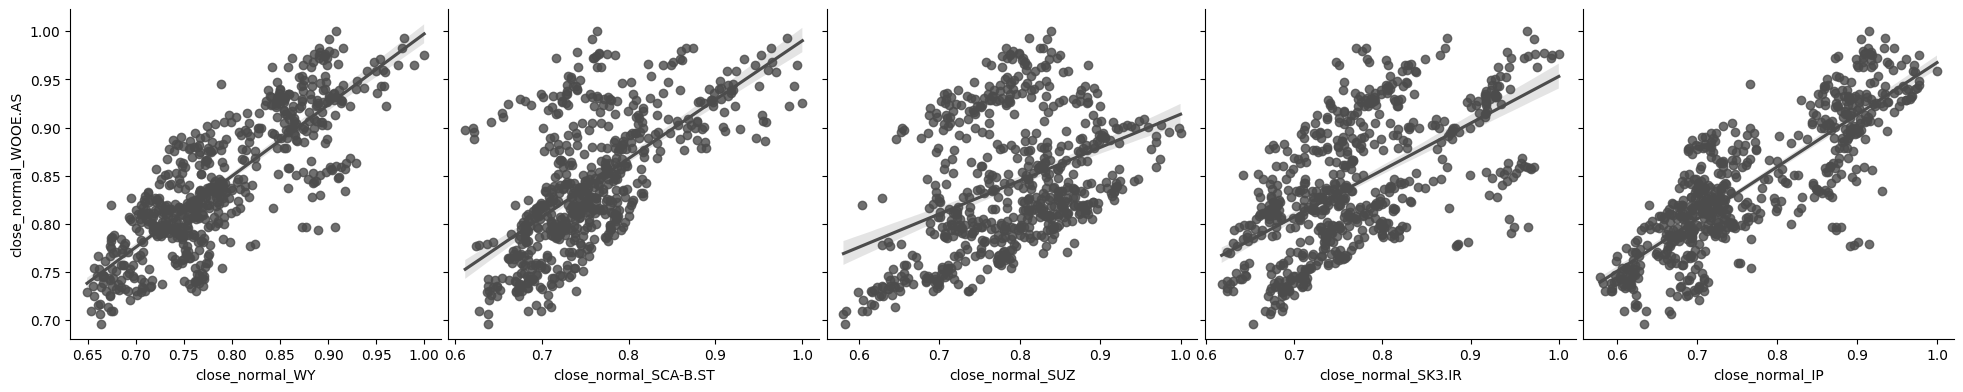

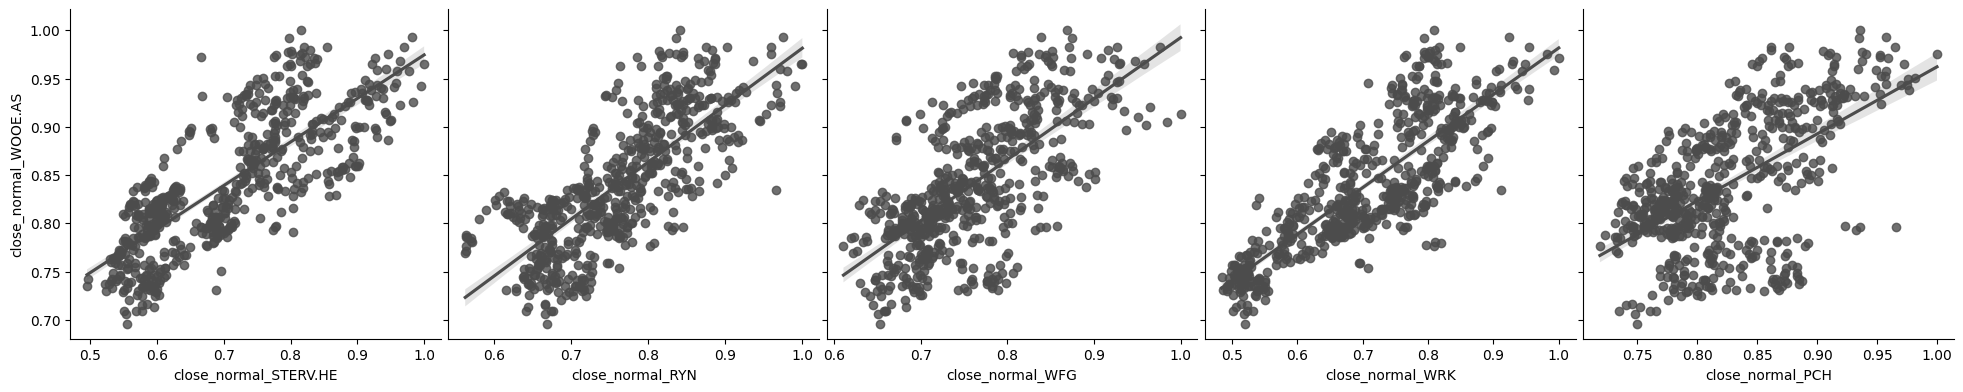

In [279]:
g = sns.PairGrid(bucket_stock_prices, y_vars=["close_normal_WOOE.AS"], x_vars=["close_normal_WY", "close_normal_SCA-B.ST",'close_normal_SUZ', 'close_normal_SK3.IR', 'close_normal_IP'], height=4)
h = sns.PairGrid(bucket_stock_prices, y_vars=["close_normal_WOOE.AS"], x_vars=['close_normal_STERV.HE','close_normal_RYN', 'close_normal_WFG', 'close_normal_WRK', 'close_normal_PCH'], height=4) # y_vars tips = ETF, x_vars = all stocks

g.map(sns.regplot, color=".3")
h.map(sns.regplot, color=".3")

g.figure.subplots_adjust(wspace=.02, hspace=.02)
h.figure.subplots_adjust(wspace=.02, hspace=.02)

<font color='#5891db'>The linear graph shows the predicted values ​​of the linear regression. The points show the actual values. There is a linear relationship that can be visually recognized.</font>

### residual plot

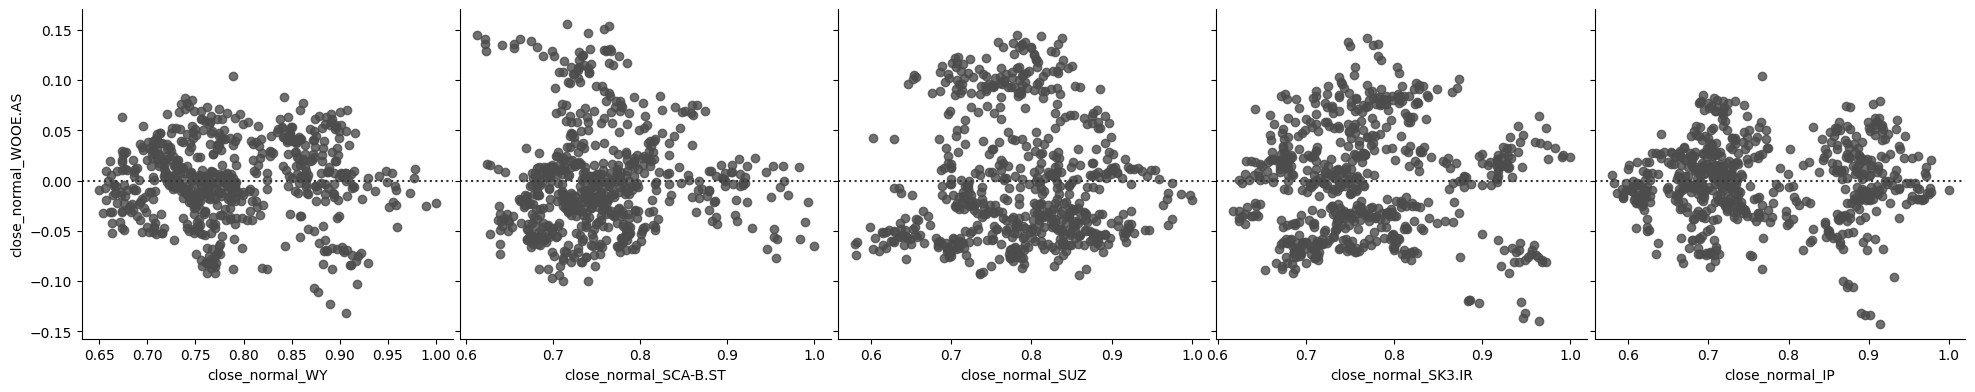

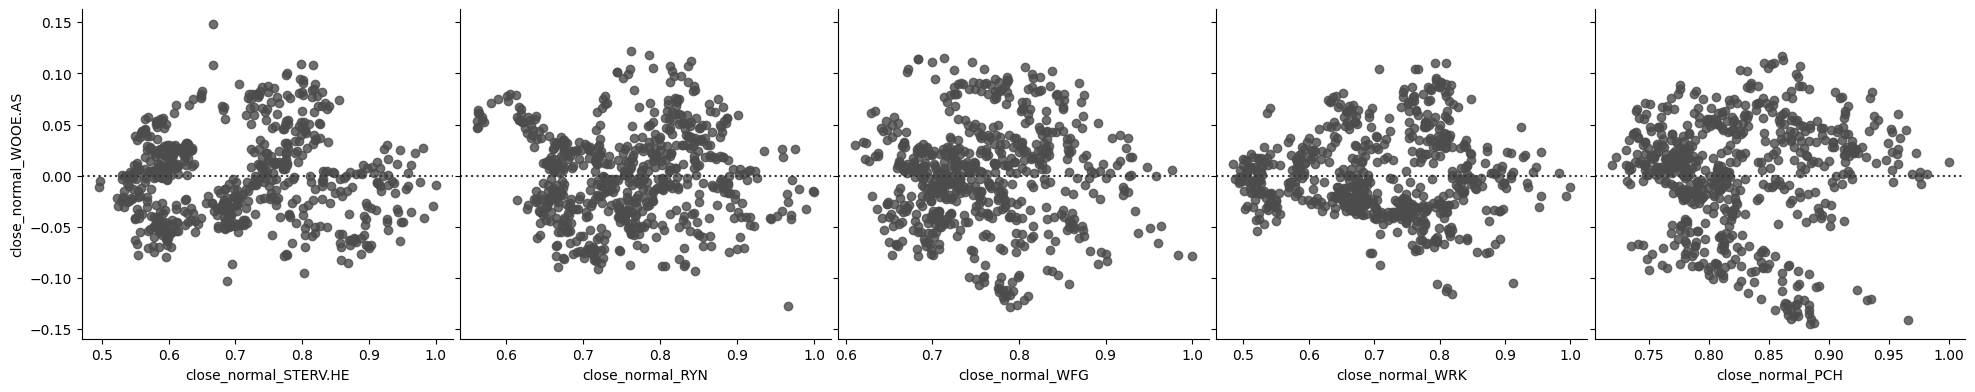

In [281]:
g = sns.PairGrid(bucket_stock_prices, y_vars=["close_normal_WOOE.AS"], x_vars=["close_normal_WY", "close_normal_SCA-B.ST",'close_normal_SUZ', 'close_normal_SK3.IR', 'close_normal_IP'], height=4)
h = sns.PairGrid(bucket_stock_prices, y_vars=["close_normal_WOOE.AS"], x_vars=['close_normal_STERV.HE','close_normal_RYN', 'close_normal_WFG', 'close_normal_WRK', 'close_normal_PCH'], height=4) # y_vars tips = ETF, x_vars = all stocks

g.map(sns.residplot, color=".3")
h.map(sns.residplot, color=".3")

g.figure.subplots_adjust(wspace=.02, hspace=.02)
h.figure.subplots_adjust(wspace=.02, hspace=.02)

<font color='#5891db'>The points are evenly distributed around the zero line and have similar deviations. No curvature is noticeable. A linear relationship is assumed.</font>

In [ ]:
g = sns.PairGrid(bucket_stock_prices, y_vars=["close_normal_WOOE.AS"], x_vars=["close_normal_WY", "close_normal_SCA-B.ST",'close_normal_SUZ', 'close_normal_SK3.IR', 'close_normal_IP'], height=4)
h = sns.PairGrid(bucket_stock_prices, y_vars=["close_normal_WOOE.AS"], x_vars=['close_normal_STERV.HE','close_normal_RYN', 'close_normal_WFG', 'close_normal_WRK', 'close_normal_PCH'], height=4) # y_vars tips = ETF, x_vars = all stocks

g.map(sns.residplot, color=".3")
h.map(sns.residplot, color=".3")

g.figure.subplots_adjust(wspace=.02, hspace=.02)
h.figure.subplots_adjust(wspace=.02, hspace=.02)

<Figure size 600x500 with 0 Axes>

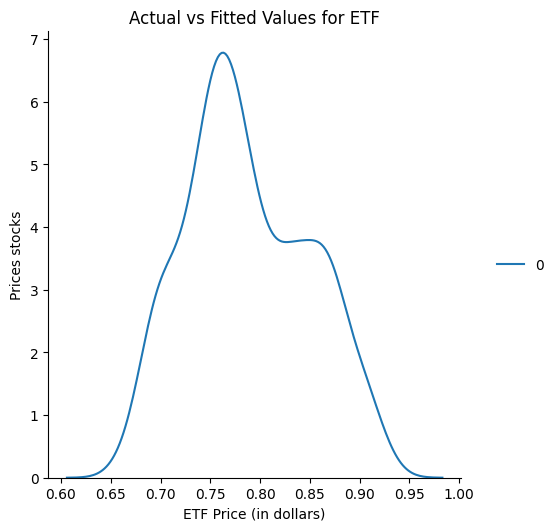

In [136]:
plt.figure(figsize=(width, height))
sns.displot(Yhat, label="Fitted Values" , kind="kde")
plt.title('Actual vs Fitted Values for ETF')
plt.xlabel('ETF Price (in dollars)')
plt.ylabel('Prices stocks')
plt.show()
plt.close()

<Figure size 600x500 with 0 Axes>

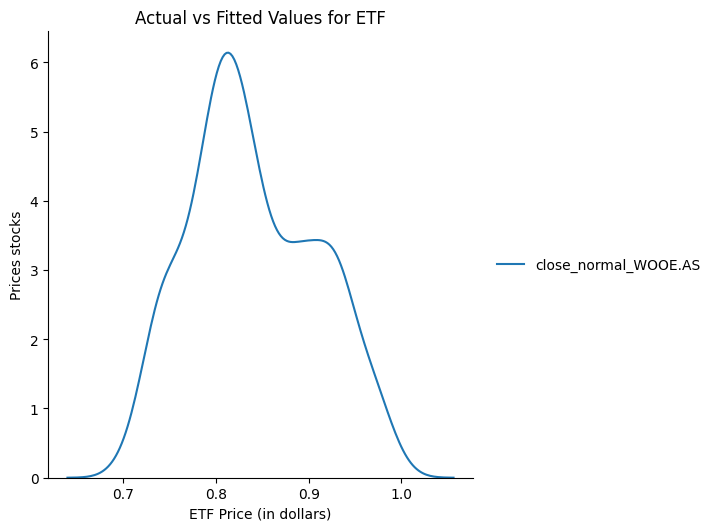

In [137]:
plt.figure(figsize=(width, height))
sns.displot(aux_var_stock_price_1, color="r", label="Actual Value", kind="kde")
plt.title('Actual vs Fitted Values for ETF')
plt.xlabel('ETF Price (in dollars)')
plt.ylabel('Prices stocks')
plt.show()
plt.close()

# multiple linear regression

In [139]:
ticker_symbol_3 = 'SCA-B.ST'
ticker_symbol_4 = 'SUZ'

# load first item
company_name = yf.Ticker(ticker_symbol_3).info['longName'].replace(r'/', ' ')
columns = '`close_normal_' + ticker_symbol_3 + '`'
conn = sqlite3.connect('stocks_prep.db')
sql = "SELECT " + columns + " FROM `" + company_name + "`"
aux_var_stock_price_3 = pd.read_sql(sql,conn)

# load second item
company_name = yf.Ticker(ticker_symbol_4).info['longName'].replace(r'/', ' ')
columns = 'close_normal_' + ticker_symbol_4
conn = sqlite3.connect('stocks_prep.db')
sql = "SELECT " + columns + " FROM `" + company_name + "`"
aux_var_stock_price_4 = pd.read_sql(sql,conn)

In [140]:
aux_var_stock_prices = pd.concat([aux_var_stock_price_2, aux_var_stock_price_3, aux_var_stock_price_4], axis=1)
Z = aux_var_stock_prices
lm.fit(Z, X)

LinearRegression()

In [141]:
Yhat=lm.predict(Z)
Yhat[0:3]

array([[0.81570222],
       [0.79940135],
       [0.83094969]])

In [142]:
intercept = lm.intercept_[0].round(5)
slope = lm.coef_[0].round(5)
print('The intercept is: ' ,intercept,'. And the slope is' , slope, '.') 

The intercept is:  0.16912 . And the slope is [0.60342 0.19761 0.0593 ] .


In [143]:
print(aux_var_stock_price_1.head())

   close_normal_WOOE.AS
0              0.780673
1              0.777786
2              0.779139
3              0.776703
4              0.898989


<Figure size 600x500 with 0 Axes>

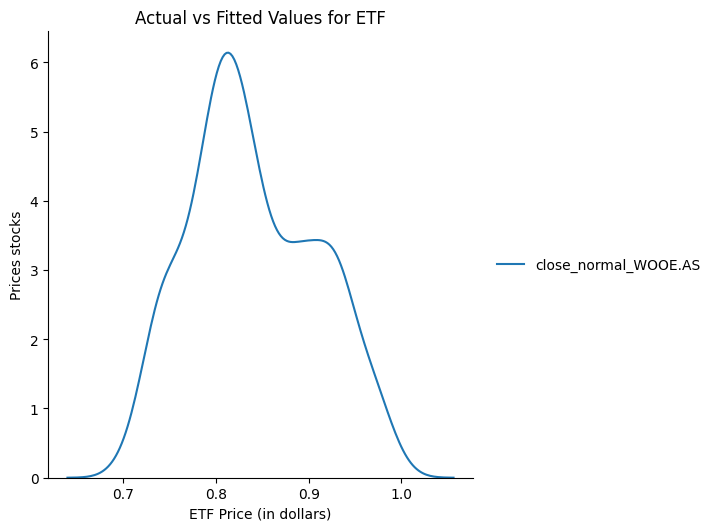

In [145]:
plt.figure(figsize=(width, height))
sns.displot(aux_var_stock_price_1, color="r", label="Actual Value", kind="kde")
plt.title('Actual vs Fitted Values for ETF')
plt.xlabel('ETF Price (in dollars)')
plt.ylabel('Prices stocks')
plt.show()
plt.close()

<Figure size 600x500 with 0 Axes>

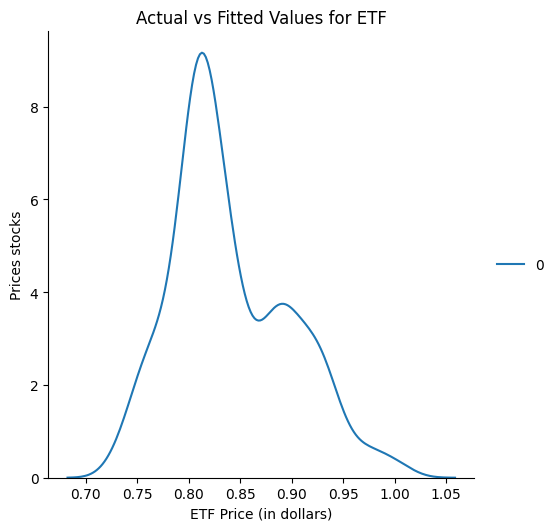

In [144]:
plt.figure(figsize=(width, height))

sns.displot(Yhat, color="b", label="Fitted Values", kind="kde")
plt.title('Actual vs Fitted Values for ETF')
plt.xlabel('ETF Price (in dollars)')
plt.ylabel('Prices stocks')
plt.show()
plt.close()

## polynominal regression and pipeline

In [188]:
#ticker_symbols = ['WY', 'SCA-B.ST'] #, 'SUZ', 'SK3.IR', 'IP', 'STERV.HE','RYN', 'WFG', 'WRK', 'PCH']

ticker_symbol_1 = 'WOOE.AS'
ticker_symbol_2 = 'WY'

# load first item
company_name = yf.Ticker(ticker_symbol_1).info['longName'].replace(r'/', ' ')
columns = '`close_normal_' + ticker_symbol_1 + '`'
conn = sqlite3.connect('stocks_prep.db')
sql = "SELECT " + columns + " FROM `" + company_name + "`"
aux_var_stock_price_1 = pd.read_sql(sql,conn)

# load second item
company_name = yf.Ticker(ticker_symbol_2).info['longName'].replace(r'/', ' ')
columns = 'close_normal_' + ticker_symbol_2
conn = sqlite3.connect('stocks_prep.db')
sql = "SELECT " + columns + " FROM `" + company_name + "`"
aux_var_stock_price_2 = pd.read_sql(sql,conn)

x =  aux_var_stock_price_1['close_normal_WOOE.AS']# = np.array(aux_var_stock_price_1)
print(x)

y =  aux_var_stock_price_2['close_normal_WY']  # np.array(aux_var_stock_price_2)
print(y)

0      0.780673
1      0.777786
2      0.779139
3      0.776703
4      0.898989
         ...   
619    0.885323
620    0.891370
621    0.895297
622    0.894309
623    0.899000
Name: close_normal_WOOE.AS, Length: 624, dtype: float64
0      0.797964
1      0.777169
2      0.824177
3      0.818810
4      0.827190
         ...   
619    0.817518
620    0.818896
621    0.815657
622    0.827149
623    0.828139
Name: close_normal_WY, Length: 624, dtype: float64


In [189]:
# Here we use a polynomial of the 3rd order (cubic) 
f = np.polyfit(x, y, 3)
p = np.poly1d(f)
print(p)

        3         2
-3.987 x + 11.09 x - 9.255 x + 3.098


<Axes: xlabel='close_normal_WY', ylabel='close_normal_WOOE.AS'>

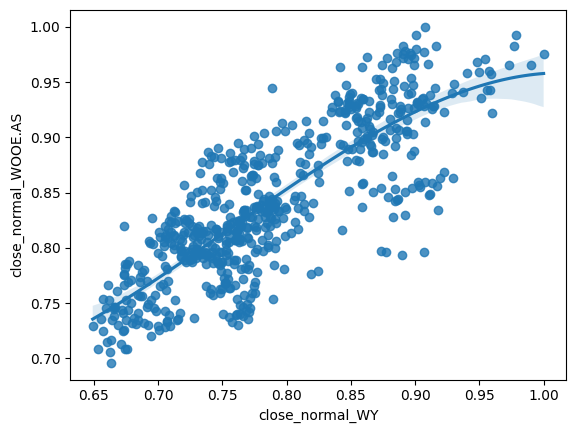

In [190]:
sns.regplot(x="close_normal_WY", y="close_normal_WOOE.AS", data=aux_var_stock_prices, order = 3)

In [178]:
np.polyfit(x, y, 3)

array([-3.98734431, 11.08601712, -9.25544966,  3.09842325])

In [192]:
pr=PolynomialFeatures(degree=2)
pr

PolynomialFeatures()

In [194]:
Z_pr=pr.fit_transform(Z)

In [195]:
Z.shape

(624, 3)

In [196]:
Z_pr.shape

(624, 10)

# Pipeline

In [198]:
Input=[('scale',StandardScaler()), ('polynomial', PolynomialFeatures(include_bias=False)), ('model',LinearRegression())]

In [199]:
pipe=Pipeline(Input)
pipe

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [200]:
Z = Z.astype(float)
pipe.fit(Z,y)

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [201]:
ypipe=pipe.predict(Z)
ypipe[0:4]

array([0.79796385, 0.77716915, 0.82417739, 0.81880971])

## in sample evaluation

# simple linear regression

In [202]:
#highway_mpg_fit
lm.fit(X, Y)
# Find the R^2
print('The R-square is: ', lm.score(X, Y))

The R-square is:  0.6697052108440107


In [203]:
Yhat=lm.predict(X)
print('The output of the first four predicted value is: ', Yhat[0:4])

The output of the first four predicted value is:  [[0.73358979]
 [0.73097564]
 [0.73220101]
 [0.72999536]]


In [211]:
print(aux_var_stock_prices.head())


   close_normal_WOOE.AS  close_normal_WY
0              0.780673         0.797964
1              0.777786         0.777169
2              0.779139         0.824177
3              0.776703         0.818810
4              0.898989         0.827190


In [213]:
mse = mean_squared_error(aux_var_stock_prices['close_normal_WOOE.AS'], Yhat)
print('The mean square error of price and predicted value is: ', mse)

The mean square error of price and predicted value is:  0.0028199989176199087


# multiple linear regression

In [214]:
# fit the model 
lm.fit(Z, aux_var_stock_prices['close_normal_WOOE.AS'])
# Find the R^2
print('The R-square is: ', lm.score(Z,aux_var_stock_prices['close_normal_WOOE.AS']))

The R-square is:  0.7080588695949548


In [215]:
Y_predict_multifit = lm.predict(Z)

In [216]:
print('The mean square error of price and predicted value using multifit is: ', \
      mean_squared_error(aux_var_stock_prices['close_normal_WOOE.AS'], Y_predict_multifit))

The mean square error of price and predicted value using multifit is:  0.0013464622351455633


## polynominal fit

In [218]:
r_squared = r2_score(y, p(x))
print('The R-square value is: ', r_squared)

The R-square value is:  0.6740501586718841


In [220]:
mean_squared_error(aux_var_stock_prices['close_normal_WOOE.AS'], p(x))

0.0028445314550855686

## prediction and decision making

In [221]:
new_input=np.arange(1, 100, 1).reshape(-1, 1)

In [222]:
lm.fit(X, Y)
lm

LinearRegression()

In [223]:
yhat=lm.predict(new_input)
yhat[0:5]

/home/lj/JohannsenDrive/Aktuelle_Projekte/Scaja_Projekt/scaja_data/scaja_data_marketing/07_python_libraries_ultimate_toolkits/notebooks/venv/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[0.93218241],
       [1.83764674],
       [2.74311107],
       [3.64857539],
       [4.55403972]])

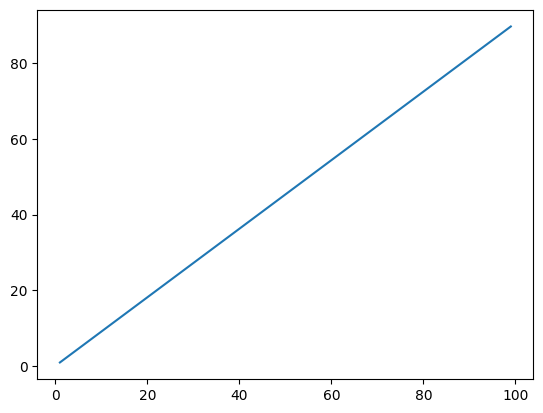

In [224]:
plt.plot(new_input, yhat)
plt.show()

# conclusion

Do the predicted values make sense?

simple linear regression:
R-squared: 
MSE: 

multiple linear regression:
R-squared: 
MSE: 

polynominal fit:
R-squared: 
MSE: 


Visualization           

Numerical measures for evaluation

Comparing models